<a href="https://colab.research.google.com/github/syamdunnala/Flipkartproduct_review_scrapper/blob/master/Flipkar_product_Reviews_%20from%20image%20SCRAPPER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Flipkart** **Product** **Reviews**

In [2]:
##installing required libraries
!pip install BeautifulSoup #run only once
!pip install requests

ERROR: Command errored out with exit status 1: python setup.py egg_info Check the logs for full command output.


In [3]:
!pip install easyocr

     |████████████████████████████████| 48.4MB 63kB/s 


In [4]:
import matplotlib.pyplot as plt
import cv2
import easyocr
from pylab import rcParams
from IPython.display import Image

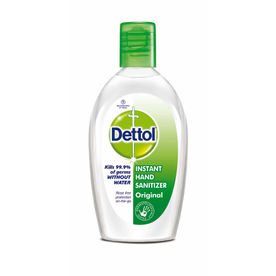

In [6]:
rcParams['figure.figsize'] = 8, 16
reader = easyocr.Reader(['en'])
file_name = "Dell.jpg"
Image(file_name)

In [14]:
output = reader.readtext(file_name)
cord = output[0][1]
input = cord.replace("'","")
input

'Dettol'

In [19]:
# doing necessary imports
import requests
from bs4 import BeautifulSoup as bs
from urllib.request import urlopen as uReq
flipkart_url = "https://www.flipkart.com/search?q=input" # preparing the URL to search the product on flipkart
uClient = uReq(flipkart_url) # requesting the webpage from the internet
flipkartPage = uClient.read() # reading the webpage

In [20]:

uClient.close() # closing the connection to the web server
flipkart_html = bs(flipkartPage, "html.parser") # parsing the webpage as HTML
bigboxes = flipkart_html.findAll("div", {"class": "bhgxx2 col-12-12"}) # seacrhing for appropriate tag to redirect to the product link
del bigboxes[0:3] # the first 3 members of the list do not contain relevant information, hence deleting them.
box = bigboxes[0] #  taking the first iteration (for demo)
productLink = "https://www.flipkart.com" + box.div.div.div.a['href'] # extracting the actual product link
prodRes = requests.get(productLink) # getting the product page from server
prod_html = bs(prodRes.text, "html.parser") # parsing the product page as HTML
commentboxes = prod_html.find_all('div', {'class': "_3nrCtb"}) # finding the HTML section containing the customer comments
filename = input+".csv" #  filename to save the details

In [25]:
filename

'Dettol.csv'

In [21]:

fw = open(filename, "w") # creating a local file to save the details
headers = "Product, Customer Name, Rating, Heading, Comment \n" # providing the heading of the columns
fw.write(headers) # writing first the headers to file
reviews = [] # initializing an empty list for reviews
searchString=input


In [22]:
#  iterating over the comment section to get the details of customer and their comments                
for commentbox in commentboxes:
                    try:
                        name = commentbox.div.div.find_all('p', {'class': '_3LYOAd _3sxSiS'})[0].text

                    except:
                        name = 'No Name'

                    try:
                        rating = commentbox.div.div.div.div.text

                    except:
                        rating = 'No Rating'

                    try:
                        commentHead = commentbox.div.div.div.p.text

                    except:
                        commentHead = 'No Comment Heading'

                    try:
                        comtag = commentbox.div.div.find_all('div', {'class': ''})
                        custComment = comtag[0].div.text

                    except:
                        custComment = 'No Customer Comment'

                    mydict = {"Product": searchString, "Name": name, "Rating": rating, "CommentHead": commentHead,
                    "Comment": custComment} # saving that detail to a dictionary                   
                    fw.write(searchString+","+name.replace(",", ":")+","+rating + "," + commentHead.replace(",", ":") + "," + custComment.replace(",", ":") + "\n")
                    reviews.append(mydict) #  appending the comments to the review list
fw.close()
#return render_template('results.html', reviews=reviews) # showing the review to the user              

# **Exporting** **to** .**csv** **file**

In [26]:
from google.colab import files
files.download("Dettol.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>